# Описание проекта:

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Задачи:

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.

# Цель:
Проанализировать отток клиентов фитнес-центров «Культурист-датасаентист»

# План проекта:
Шаг 1. Загрузить данные

Шаг 2. Провести исследовательский анализ данных (EDA)

Шаг 3. Построить модель прогнозирования оттока клиентов

Шаг 4. Сделайть кластеризацию клиентов

Шаг 5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами

## Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
data = pd.read_csv('C:/Users/Ирина/Downloads/gym_churn.csv')

In [5]:
data.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Данные загрузили, вывели 10 строк датасета для ознакомления.

## Шаг 2. Исследовательский анализ данных (EDA)

Посмотрим на датасет: есть ли в нем отсутствующие признаки, рассмотрим средние значения и стандартные отклонения и тд.

In [6]:
data.info()
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Выводы:

- Почти поровну мужчин и женщин;
- 84% клиентов живут/работают рядом с фитнес-центром;
- 49% клиентов являются сотрудником компании-партнёра клуба;
- 31% клиентов были приведены по акции "Приведи друга";
- 90% клиентов указали телефон;
- Средняя длительность текущего абонемента 4,68 месяцев. Медианное значение - 1 месяц;
- 41% клиент посещал групповые занятия;
- средний возраст - 29 лет;
- В среднем фитнес-центр зарабатывает 146.9 с клиента;
- Среднее время до конца абонемента 4,32 месяца. Медианное значение - 1 месяц;
- В среднем клиенты с нами около 4 месяцев, медианное значение - 3 месяца;
- Средняя частота посещений в неделю за все время почти такая же как и за прошлый месяц, 1.77;
- Средняя частота посещений в неделю за прошлый месяц составляет 1.88;
- Переменные Age и Avg_additional_charges_total необходимо стандартизировать;
- Среднее значение оттока - 27%

Проверим на наличие дублей и пропущенных значений

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [9]:
# Приведем название столбцев к нижнему регистру:
data.columns = [i.lower() for i in data]
data.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

Дублей и пропущенных значений - нет. Привели все столбцы к нижнему регистру.

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [10]:
data.groupby('churn').agg('mean').transpose()

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Выводы:

- Уходят поровну и мужчины и женщины;
- никак не влияет наличие телефона, указанный возраст;
- средняя частота посещений в неделю за предыдущий месяц для людей в оттоке в 2 раза меньше;

Уходят чаще те, кто:

1) живет/работает дальше от фитнес-центра;

2) не является сотрудником компании-партнёра клуба;

3) имеет абонемент сроком 1-2 месяца;

4) не посещают груповые занятия;

5) пришли не по промо-акции.

In [11]:
# Разделим столбцы данных на бинарные и количественные признаки в списки:
bin_columns= ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
quant_columns = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

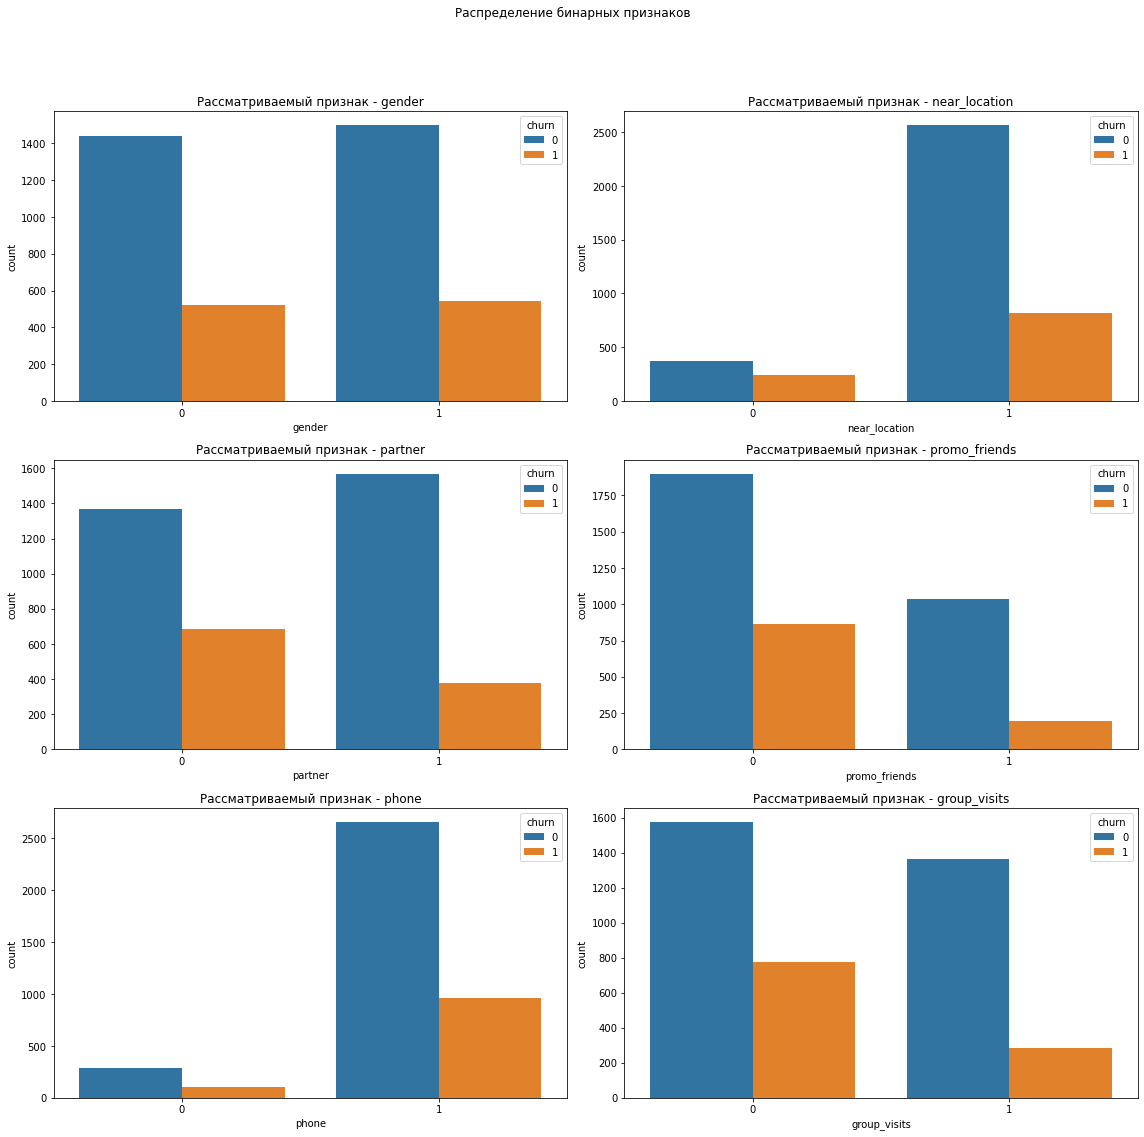

In [12]:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(16,15))
for idx, i in enumerate(bin_columns):
    sns.countplot(x = i, hue='churn', data=data, ax=ax[idx//2,idx%2])
    ax[idx// 2,idx % 2].set_title('Рассматриваемый признак - {}'.format(i))
    ax[idx// 2,idx % 2].set_xlabel(i)
    fig.suptitle('Распределение бинарных признаков', y=1.05)
    plt.tight_layout()
    

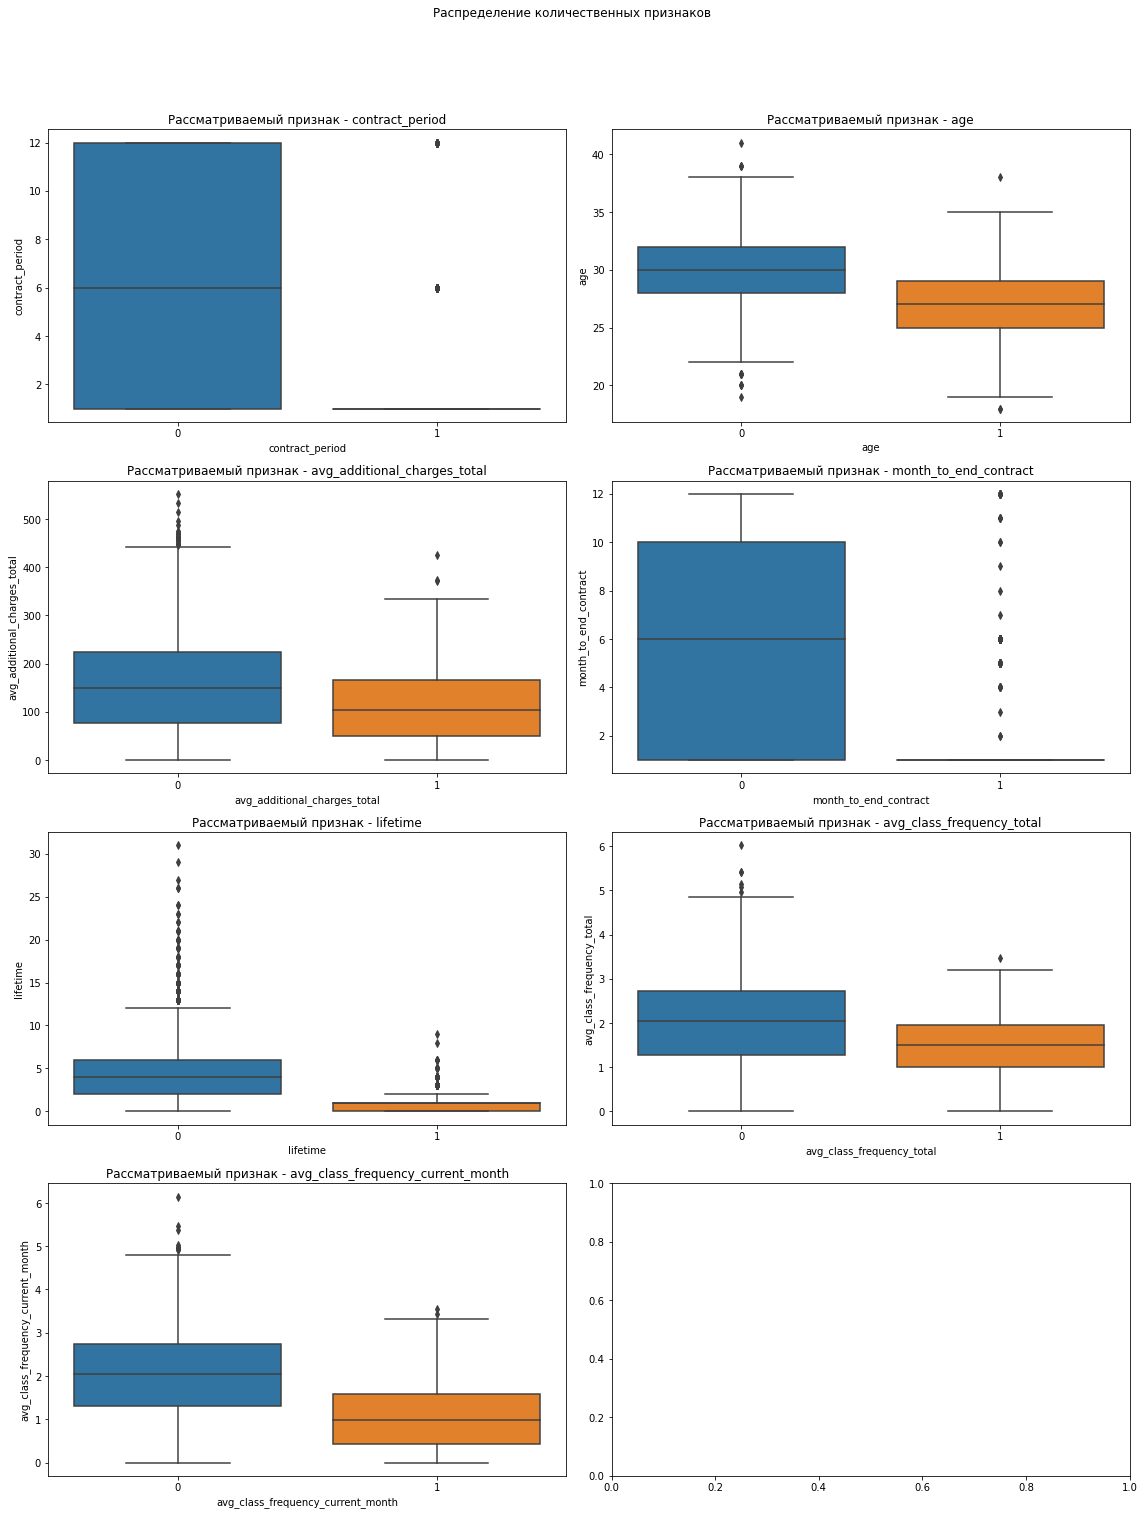

In [13]:
# Пострим "ящик с усами" для каждого из количественных признаков, сравним ушедших и оставшихся:
fig,ax = plt.subplots(nrows=4,ncols=2,figsize=(16,20))
for idx, i in enumerate(quant_columns):
    sns.boxplot(x = 'churn', y = i, data = data, ax=ax[idx//2,idx%2])
    ax[idx// 2,idx % 2].set_title('Рассматриваемый признак - {}'.format(i))
    ax[idx// 2,idx % 2].set_xlabel(i)
    fig.suptitle('Распределение количественных признаков', y=1.05)
    plt.tight_layout()

In [14]:
# Построим таблицу корреляции признаков:
display(data.corr())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


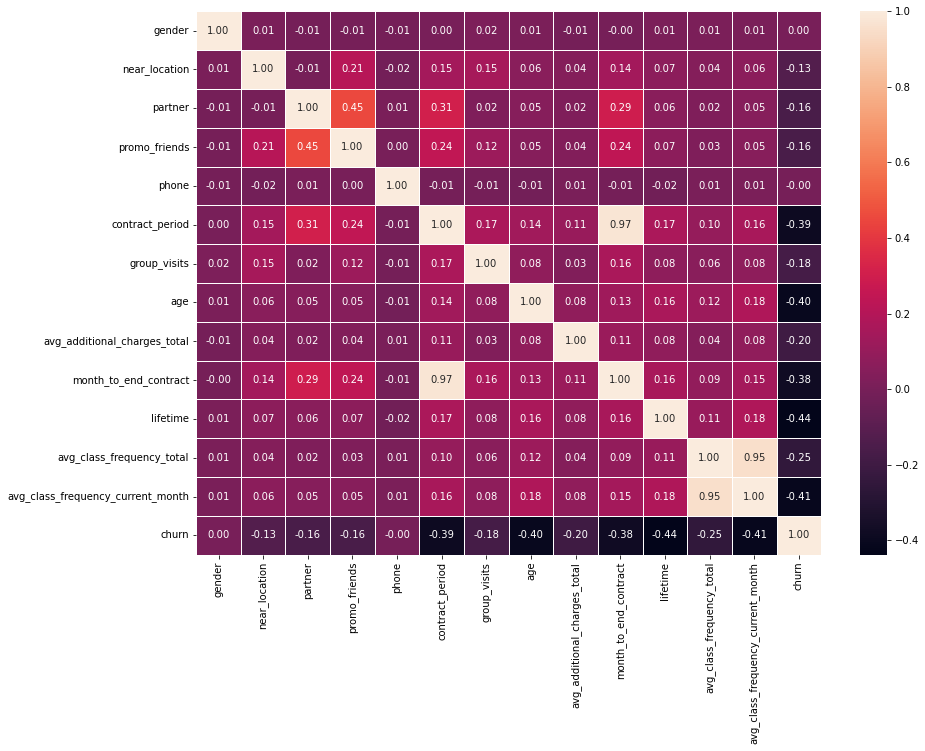

In [15]:
# Построим матрицу корреляции признаков с помощью heatmap:
plt.figure(figsize=(14, 10))
sns.heatmap( data.corr(), annot = True, fmt = '0.2f', linewidths=.5)
plt.show()

Явной зависимости факта оттока от каких-либо признаков нет;
Сильно коррелируют:
1) 'contract_period' и 'month_to_end_contract';

2) 'avg_class_frequency_current_month' и 'avg_class_frequency_total'.

Чтобы избавиться от мультиколлинеарности, удалим из датафрейма один из каждой пары.

In [16]:
data.drop('month_to_end_contract', axis = 1, inplace = True)
data.drop('avg_class_frequency_total', axis = 1, inplace = True)

## Шаг 3. Модель прогнозирования оттока клиентов

Построим модель бинарной классификации пользователей, где целевой признак - факт оттока пользователя в следующем месяце.

Этапы: 1) Разобъем данные на обучающую и валидационную выборки функцией train_test_split();

2) Обучим модель на train-выборке логистической регрессией и случайным лесом;

3) Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели и сделаем выводы.

In [17]:
# посмотрим, как соотносятся классы набора данных:
print('Соотношение классов:\n', data['churn'].value_counts())

Соотношение классов:
 0    2939
1    1061
Name: churn, dtype: int64


In [18]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y):
X = data.drop('churn', axis = 1)
y = data['churn']

In [19]:
# разделяем модель на обучающую и валидационную выборку:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [20]:
# обучим StandartScaler на обучающей выборке:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [21]:
# Преобразуем обучающий и валидационные наборы данных:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [22]:
#Задаем алгоритм для модели:
lr_model = LogisticRegression(solver='liblinear',random_state=0)

In [23]:
# Обучим модель:
lr_model.fit(X_train_st, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [24]:
# Воспользуемся уже обученной моделью, чтобы сделать прогнозы:
lr_predictions = lr_model.predict(X_test_st)

In [25]:
# Выведем веса и нулевой коэффициент:
print(lr_model.coef_) 
print(lr_model.intercept_) 

[[ 0.02435228 -0.06325383 -0.05799998 -0.15007384 -0.07493617 -1.37710805
  -0.37541984 -1.15510683 -0.56168546 -3.5486095  -1.27180585]]
[-3.6900244]


In [26]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса:
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)

In [27]:
# обучим модель случайного леса
rf_model.fit(X_train_st,y_train)

RandomForestClassifier(random_state=0)

In [28]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions =  rf_model.predict(X_test_st)

In [29]:
#  Создадим функцию для вывода результатов:
def print_all_metrics(y_true, y_pred, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.3f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.3f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.3f}'.format(recall_score(y_true, y_pred)))

In [30]:
# выведем все метрики для логистическрй регрессии:
print_all_metrics(
    y_test,
    lr_predictions,
    title='Метрики для модели логистической регрессии:'
)

Метрики для модели логистической регрессии:
	Accuracy: 0.917
	Precision: 0.848
	Recall: 0.840


In [31]:
# выведем все метрики для случайного леса:
print_all_metrics(
    y_test,
    rf_predictions,
    title = 'Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.905
	Precision: 0.854
	Recall: 0.774


## Вывод:

- доля верно угаданных ответов из всех прогнозов (Accuracy) у модели логистическая регресия (0.92) оказалась лучше чем у случайного леса (0.91);
- доля правильных ответов только среди целевого класса (precision) у модели логистическая регресия (0.85) оказалась практически такой же как и модель со случайным леса (0.85);
- сколько реальных объектов смогли обнаружить с помощью модели (recall) у модели логистическая регресия (0.84) оказалась лучше чем у случайного леса (0.77);
- Выбираем в итоге модель - Логистическая регрессия, т.к. большенство метрик оказались лучше.

## Шаг 4. Кластеризация клиентов

Проведем кластеризацию пользователей (обучение без учителя)

Этапы: 1) Стандартизируем данные;

2) Построим матрицу расстояний функцией linkage() на стандартизированной матрице признаков и нарисуем дендограмму.

3) Обучим модель кластеризации на основе алгоритма K-Means и спрогнозируем кластеры клиентов. (берём n=5 кластеров)

In [32]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

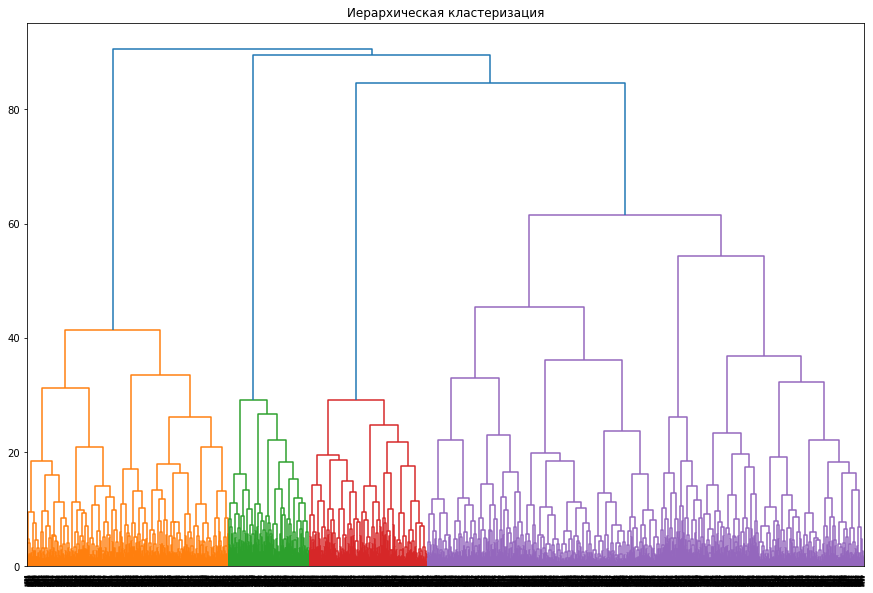

In [33]:
# Построим дендрограмму:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 

In [34]:
# задаём модель k_means с числом кластеров 5:
km = KMeans(n_clusters = 5,random_state = 0)

In [35]:
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4):
labels = km.fit_predict(X_sc)

In [36]:
# сохраняем метки кластера в поле нашего датасетаЖ=:
data['cluster_km'] = labels

In [37]:
# Выведеем объем каждого кластера:
data['cluster_km'].value_counts()

2    1064
3    1007
0     985
1     558
4     386
Name: cluster_km, dtype: int64

In [38]:
# Сгрупируем по кластерам и найдем среднее значения каждого признака:
data.groupby('cluster_km').agg('mean').transpose()

cluster_km,0,1,2,3,4
gender,0.496447,0.500000,0.500940,0.534260,0.523316
near_location,0.995939,0.000000,1.000000,0.996028,0.862694
partner,0.892386,0.489247,0.217105,0.379345,0.471503
promo_friends,1.000000,0.078853,0.072368,0.009930,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,6.922843,2.994624,2.010338,6.208540,4.777202
group_visits,0.524873,0.232975,0.277256,0.538232,0.427461
age,29.606091,28.679211,27.583647,30.699106,29.297927
avg_additional_charges_total,153.424651,137.125763,119.339956,176.259567,144.208179
lifetime,4.283249,2.974910,1.922932,5.415094,3.940415


Выводы:

Кластер 0

- Отток - 11%;
- Живут или работают недалеко от фитнес-центра;
- 89% являются сотрудниками компании-партнёра клуба;
- По промо-акции пришли все 100%;
- Заключают договора на длительный срок - более 6 месяцев;
- 52% посещают групповые занятия.

Кластер 1

- Отток - 40%;
- живут или работают в другом районе;
- 48% являются сотрудниками компании-партнёра клуба;
- По промо-акции пришли лишь 7%;
- 23% посещают групповые занятия.

Кластер 2

- Отток - 56% - самый высокий;
- Все живут или работают недалеко от фитнес-центра;
- В основном имеют короткие абонементы на 1-2 месяца;
- Наименьшее средняя частота посещений в неделю за предыдущий месяц;
- Лишь 21% являются сотрудниками компании-партнёра клуба;
- По промо-акции пришли лишь 7%;
- 27% ходят на групповые занятия.

Кластер 3

- Отток - 1% - самый низкий;
- Живут или работают недалеко от фитнес-центра;
- 38% являются сотрудниками компании-партнёра клуба;
- Заключают договора на длительный срок - более 6 месяцев;
- 53% посещают групповые занятия;
- Реже всех пришли по промо акции ;
- в среднем потратили больше всех денежных средств 176;
- средняя частота посещений в неделю за предыдущий месяц выше всех;
- время с момента первого обращения в фитнес-центр (в месяцах) больше всех - 5.4 мес.

Кластер 4

- Отток - 26%;
- 86% Живут или работают недалеко от фитнес-центра;
- Нет мобильного номера;
- 47% являются сотрудниками компании-партнёра клуба;
- По промо-акции пришли 30%;
- абонементы на 3-6 месяца;
- 42% посещают групповые занятия.

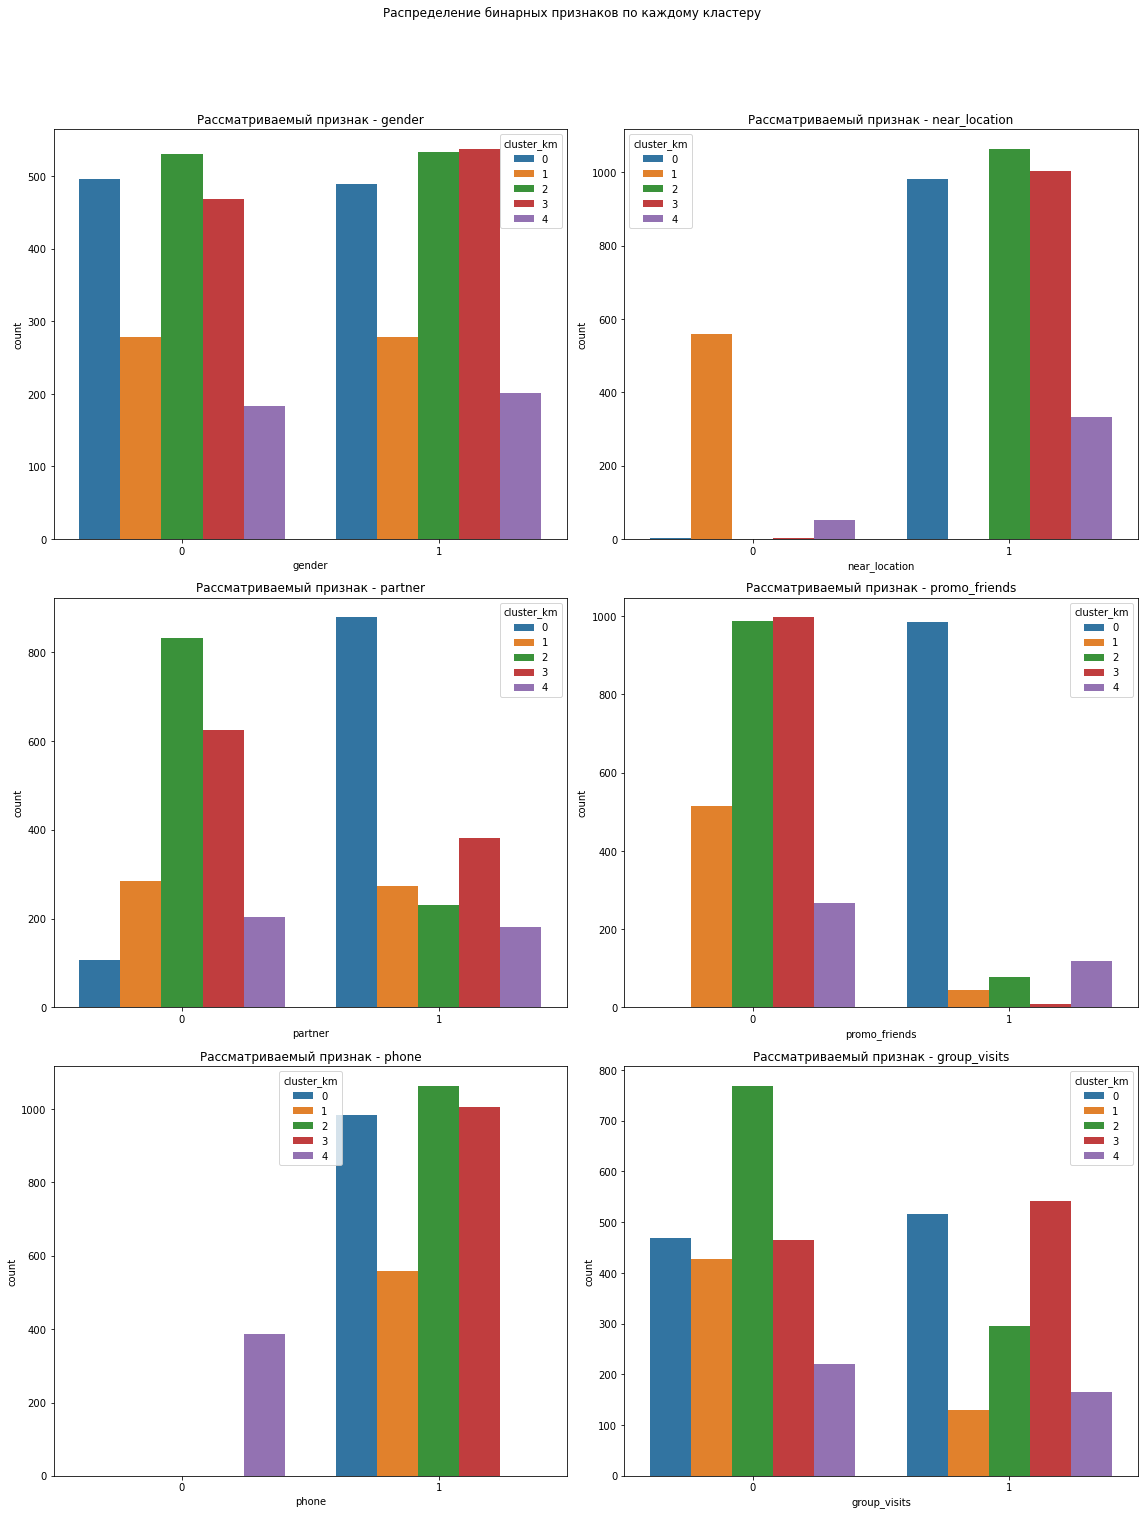

In [39]:
# Пострим гистограммы по каждому класетеру для каждого из бинарных признаков:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(16,20))
for idx, i in enumerate(bin_columns):
    sns.countplot(x = i, hue='cluster_km', data=data, ax=ax[idx//2,idx%2])
    ax[idx// 2,idx % 2].set_title('Рассматриваемый признак - {}'.format(i))
    ax[idx// 2,idx % 2].set_xlabel(i)
    fig.suptitle('Распределение бинарных признаков по каждому кластеру', y=1.05)
    plt.tight_layout()

In [40]:
# Обновим значение удалив мультиколлинеарные признаки:
quant_columns = ['contract_period', 'age', 'avg_additional_charges_total',  'lifetime',  'avg_class_frequency_current_month']

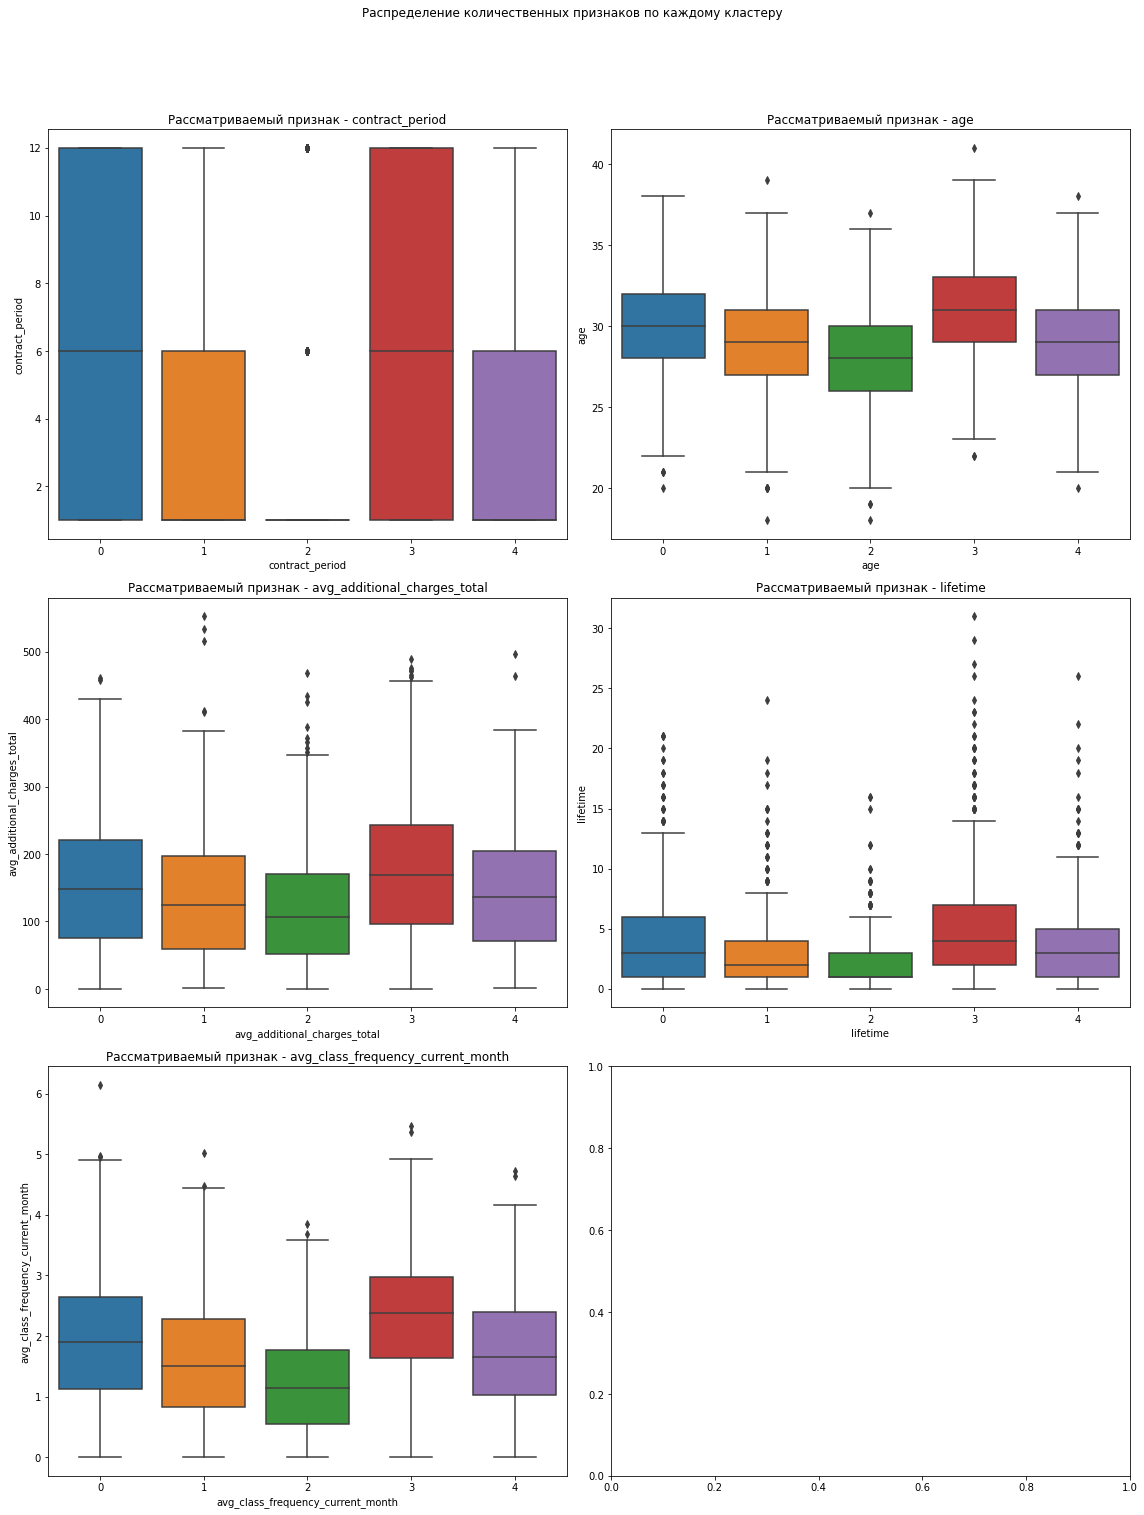

In [41]:
# Пострим "ящик с усами" по каждому кластеру для каждого из количественных признаков:
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(16,20))
for idx, i in enumerate (quant_columns):
    sns.boxplot(x = 'cluster_km', y = i, data = data, ax=ax[idx//2,idx%2])
    ax[idx// 2,idx % 2].set_title('Рассматриваемый признак - {}'.format(i))
    ax[idx// 2,idx % 2].set_xlabel(i)
    fig.suptitle('Распределение количественных признаков по каждому кластеру', y=1.05)
    plt.tight_layout()

## Шаг 5. Выводы и рекомендации по работе с клиентами

Исходные данные были достаточно чистыми, дополнительной обработки артефактов не понадобилось. Проверки проводились с целью выявить дубликаты и пропущенные значения. Привели только значения к нижнему регистру для удобства дальнейшей обработки.

Выводы по имеющимся данным:

- Почти поровну мужчин и женщин;
- 84% клиентов живут/работают рядом с фитнес-центром;
- 49% клиентов являются сотрудником компании-партнёра клуба;
- 31% клиентов были приведены по акции "Приведи друга";
- 90% клиентов указали телефон;
- Средняя длительность текущего абонемента 4,68 месяцев. Медианное значение - 1 месяц;
- 41% клиентов посещалм групповые занятия;
- Средний возраст - 29 лет;
- В среднем фитнес-центр зарабатывает 146.9 с клиента;
- Среднее время до конца абонемента 4,32 месяца. Медианное значение - 1 месяц;
- В среднем клиенты с нами около 4 месяцев, медианное значение - 3 месяца;
- Средняя частота посещений в неделю за все время почти такая же как и за прошлый месяц, 1.77.
- Средняя частота посещений в неделю за прошлый месяц составляет 1.88
- Среднее значение оттока - 27%

 Выводы на основе отличий признаков у клиентов, попавших в отток и оставшихся:

- Уходят поровну и мужчины и женщины;
- никак не влияет наличие телефона, указанный возраст;
- средняя частота посещений в неделю за предыдущий месяц для людей в оттоке в 2 раза меньше;
- чаще в отток кто, живет/работает дальше от фитнес-центра;
- чаще в отток кто, не является сотрудником компании-партнёра клуба;
- чаще в отток кто, имеет абонемент сроком 1-2 месяца;
- чаще в отток кто,не посещают груповые занятия;
- чаще в отток кто, пришли не по промо-акции.

 Построили модели обучение с учителем (Логистическая регресия) и обучение без учителя (Случайный лес):

- доля верно угаданных ответов из всех прогнозов (Accuracy) у модели логистическая регресия (0.92) оказалась лучше чем у случайного леса (0.91);
- доля правильных ответов только среди целевого класса (precision) у модели логистическая регресия (0.85) оказалась одинаковым со случайным леса (0.85);
- сколько реальных объектов смогли обнаружить с помощью модели (recall) у модели логистическая регресия (0.84) оказалась лучше чем у случайного леса (0.77);
- Выбираем в итоге модель - Логистическая регрессия, т.к. большенство метрик оказались лучше.

Разбили клиентов на 5 кластеров:

Кластер 0

- Отток - 11%;
- Живут или работают недалеко от фитнес-центра;
- 89% являются сотрудниками компании-партнёра клуба;
- По промо-акции пришли все 100%;
- Заключают договора на длительный срок - более 6 месяцев;
- 52% посещают групповые занятия.

Кластер 1

- Отток - 40%;
- живут или работают в другом районе;
- 48% являются сотрудниками компании-партнёра клуба;
- По промо-акции пришли лишь 7%;
- 23% посещают групповые занятия.

Кластер 2

- Отток - 56% - самый высокий;
- Все живут или работают недалеко от фитнес-центра;
- В основном имеют короткие абонементы на 1-2 месяца;
- Наименьшее средняя частота посещений в неделю за предыдущий месяц;
- Лишь 21% являются сотрудниками компании-партнёра клуба;
- По промо-акции пришли лишь 7%;
- 27% ходят на групповые занятия.

Кластер 3

- Отток - 1% - самый низкий;
- Живут или работают недалеко от фитнес-центра;
- 38% являются сотрудниками компании-партнёра клуба;
- Заключают договора на длительный срок - более 6 месяцев;
- 53% посещают групповые занятия;
- Реже всех пришли по промо акции ;
- в среднем потратили больше всех денежных средств 176;
- средняя частота посещений в неделю за предыдущий месяц выше всех;
- время с момента первого обращения в фитнес-центр (в месяцах) больше всех - 5.4 мес.

Кластер 4

- Отток - 26%;
- 86% Живут или работают недалеко от фитнес-центра;
- Нет мобильного номера;
- 47% являются сотрудниками компании-партнёра клуба;
- По промо-акции пришли 30%;
- абонементы на 3-6 месяца;
- 42% посещают групповые занятия.


Рекомендации:

Стимулировать на покупку более длительных абонементов и на активное участие в групповых занятиях;
Расширять сеть партнеров, для привлечения лояльных сотрудников партнеров;
Промо-акцию приведи друга считать успешной и далее продвигать активнее - люди любят ходить не в одиночку;
Не тратить рекламный бюджет для клиентов живущих или работающих в других районах.